In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
from keras import datasets
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + "/../")

from bfcnn import BFCNN

In [2]:
# ==============================================================================

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.disable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# ==============================================================================

MIN_STD = 0.1
MAX_STD = 50
EPOCHS = 20
STEP_SIZE = 30
LR_DECAY = 0.8
LR_INITIAL = 0.1
BATCH_SIZE = 32
INITIAL_EPOCH = 0
CLIP_NORMAL = 1.0
INPUT_SHAPE = (28, 28, 1)
PRINT_EVERY_N_BATCHES = 1000


In [3]:
# build model
model = BFCNN(input_dims=INPUT_SHAPE)

In [4]:
(x_train, y_train), _ = datasets.mnist.load_data()

trained_model, history = \
    BFCNN.train(
        model=model.trainable_model, 
        input_dims=INPUT_SHAPE,
        dataset=x_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        min_noise_std=MIN_STD,
        max_noise_std=MAX_STD,
        lr_initial=LR_INITIAL,
        lr_decay=LR_DECAY,
        print_every_n_batches=PRINT_EVERY_N_BATCHES)



2021-03-24 15:43:34,899 INFO model.py:train:274] begin training


Epoch 1/20


/home/arxwn/repositories/blind_image_denoising/venv/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1875/1875 [==============================] - 273s 145ms/step - batch: 937.0000 - size: 32.0000 - loss: 5.7068 - mae_loss: 5.7068
Epoch 2/20
1875/1875 [==============================] - 271s 144ms/step - batch: 937.0000 - size: 32.0000 - loss: 3.4496 - mae_loss: 3.4496
Epoch 3/20
1875/1875 [==============================] - 268s 143ms/step - batch: 937.0000 - size: 32.0000 - loss: 3.2901 - mae_loss: 3.2901
Epoch 4/20
1875/1875 [==============================] - 264s 141ms/step - batch: 937.0000 - size: 32.0000 - loss: 3.1472 - mae_loss: 3.1472
Epoch 5/20
1875/1875 [==============================] - 276s 147ms/step - batch: 937.0000 - size: 32.0000 - loss: 3.1097 - mae_loss: 3.1097
Epoch 6/20
1875/1875 [==============================] - 275s 147ms/step - batch: 937.0000 - size: 32.0000 - loss: 3.0022 - mae_loss: 3.0022
Epoch 7/20
1875/1875 [==============================] - 275s 147ms/step - batch: 937.0000 - size: 32.0000 - loss: 2.9697 - mae_loss: 2.9697
Epoch 8/20
1875/1875 [=========

2021-03-24 17:17:19,321 INFO model.py:train:291] finished  training


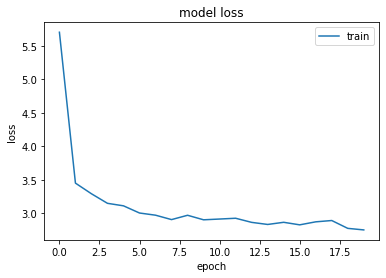

In [5]:
# summarize history for loss
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()